## German Credit Risk Analysis

### 1.Problem Statement

The objective of this project is to develop a predictive model that can assess the credit risk of individuals based on a set of demographic and financial features. The dataset provided contains the following attributes:

Age (numeric)
Sex (text: male, female)
Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
Housing (text: own, rent, or free)
Saving accounts (text - little, moderate, quite rich, rich)
Checking account (numeric, in DM - Deutsch Mark)
Credit amount (numeric, in DM)
Duration (numeric, in months)
Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

The ultimate goal of this project is to classify individuals into two categories: "good" or "bad" credit risk. This classification will help financial institutions in assessing the creditworthiness of loan applicants, which is vital for making informed lending decisions.

To achieve this goal, we will:

Preprocess the dataset by handling missing data, encoding categorical variables, and scaling numerical features.
Explore and analyze the dataset to gain insights into the distribution of features and the relationships between them.
Split the dataset into a training set and a testing set to train and evaluate the predictive model.
Select an appropriate machine learning algorithm for classification, such as logistic regression, decision trees, or random forests.
Train the selected model on the training data, optimizing its hyperparameters if necessary.
Evaluate the model's performance using appropriate metrics, such as accuracy, precision, recall, and F1-score.
Interpret the model's results to understand which features are most influential in determining credit risk.
Deploy the model for real-time credit risk assessment if needed.

By developing an accurate credit risk classification model, we aim to assist financial institutions in making more informed lending decisions, reducing the risk of defaults, and improving the overall quality of their loan portfolios.






### 2.Data Collection

- The data consists of 11 columns and 1000 rows.

### 2.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [93]:
df = pd.read_csv('data/german_credit_data.csv')

#### Show top 5 records

In [94]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Shape of the dataset

In [95]:
df.shape

(1000, 11)

### 2.2 Dataset information

German Credit Dataset
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [96]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [97]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [98]:
df['Saving accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [99]:
df['Checking account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

### Fill all null objects with 'Unknown'

In [100]:
df=df.fillna({'Saving accounts':df['Saving accounts'].mode()[0],'Checking account':df['Checking account'].mode()[0]})

In [101]:
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

### 3.2 Check Duplicates

In [102]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [103]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


### 3.4 Checking the number of unique values of each column

In [104]:
df.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64

### 3.5 Check statistics of data set

In [105]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


Age:

The mean age of individuals in the dataset is approximately 35.55 years.
The minimum age is 19 years, and the maximum age is 75 years.
The majority of individuals fall within the 27 to 42 years age range, as indicated by the 25th percentile and 75th percentile values.
The distribution of ages appears to be somewhat positively skewed, given that the mean is slightly higher than the median (50th percentile).

Job:

The "Job" column is likely a categorical variable representing the type of job. It ranges from 0 to 3.
The most common job type is "skilled" (Job = 2), as indicated by the mean.
The standard deviation is relatively low, suggesting that the distribution may be somewhat concentrated around the mean value.

Credit amount:

The mean credit amount is approximately 3,271.26 DM (Deutsch Mark).
The credit amount varies widely, with the minimum being 250 DM and the maximum being 18,424 DM.
The distribution of credit amounts appears to be positively skewed, given that the mean is higher than the median.
The 25th percentile (Q1) and 75th percentile (Q3) provide information about the spread of the data, with most values falling between these two values.

Duration:

The mean duration of loans is approximately 20.90 months.
The loan duration ranges from a minimum of 4 months to a maximum of 72 months.
Similar to credit amount, the distribution of loan durations appears to be positively skewed.
Most loans have durations falling within the range of 12 to 24 months, as suggested by the 25th and 75th percentiles.

Inferences:

The dataset appears to include information about individuals applying for loans, with attributes such as age, job type, credit amount, and loan duration.
The distribution of credit amount and loan duration shows positive skewness, meaning that there are some loans with very high amounts and durations.
The age distribution is somewhat positively skewed, with a relatively narrow spread between the 25th and 75th percentiles.
The "Job" column is categorical, indicating the type of job. "Skilled" jobs are the most common in the dataset.

### 3.7 Exploring Data

In [106]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,little,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,little,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


##### Create a New column Id by replacing unnamed column

In [107]:
df=df.rename(columns={'Unnamed: 0':'Id'})

In [108]:
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,little,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,little,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Fetch the following groupby results

In [109]:
df.groupby(['Sex','Risk','Purpose']).count()['Id']

Sex     Risk  Purpose            
female  bad   business                 7
              car                     40
              domestic appliances      2
              education                9
              furniture/equipment     28
              radio/TV                19
              repairs                  2
              vacation/others          2
        good  business                12
              car                     54
              domestic appliances      4
              education               15
              furniture/equipment     46
              radio/TV                66
              repairs                  3
              vacation/others          1
male    bad   business                27
              car                     66
              domestic appliances      2
              education               14
              furniture/equipment     30
              radio/TV                43
              repairs                  6
              vacation/

In [110]:
df.groupby(['Purpose','Risk','Sex']).count()['Id']

Purpose              Risk  Sex   
business             bad   female      7
                           male       27
                     good  female     12
                           male       51
car                  bad   female     40
                           male       66
                     good  female     54
                           male      177
domestic appliances  bad   female      2
                           male        2
                     good  female      4
                           male        4
education            bad   female      9
                           male       14
                     good  female     15
                           male       21
furniture/equipment  bad   female     28
                           male       30
                     good  female     46
                           male       77
radio/TV             bad   female     19
                           male       43
                     good  female     66
                       

In [111]:
df.columns

Index(['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [112]:
for i in df.columns:
    print("unique values in", i ,"=",df[i].unique())

unique values in Id = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 

In [113]:
print("Categories in 'Sex' variable:     ",end=" " )
print(df['Sex'].unique())

print("Categories in 'Housing' variable:  ",end=" ")
print(df['Housing'].unique())

print("Categories in 'Saving accounts' variable:",end=" " )
print(df['Saving accounts'].unique())

print("Categories in 'Checking account' variable:     ",end=" " )
print(df['Checking account'].unique())

print("Categories in 'Purpose' variable:     ",end=" " )
print(df['Purpose'].unique())

print("Categories in 'Risk' variable:     ",end=" " )
print(df['Risk'].unique())

Categories in 'Sex' variable:      ['male' 'female']
Categories in 'Housing' variable:   ['own' 'free' 'rent']
Categories in 'Saving accounts' variable: ['little' 'quite rich' 'rich' 'moderate']
Categories in 'Checking account' variable:      ['little' 'moderate' 'rich']
Categories in 'Purpose' variable:      ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Categories in 'Risk' variable:      ['good' 'bad']


In [114]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 5 numerical features : ['Id', 'Age', 'Job', 'Credit amount', 'Duration']

We have 6 categorical features : ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']


### 4. Exploring Data ( Visualization )
- Histogram
- Kernel Distribution Function (KDE)
- Countplots
- Pieplots


#### 4.1.1 Countplots

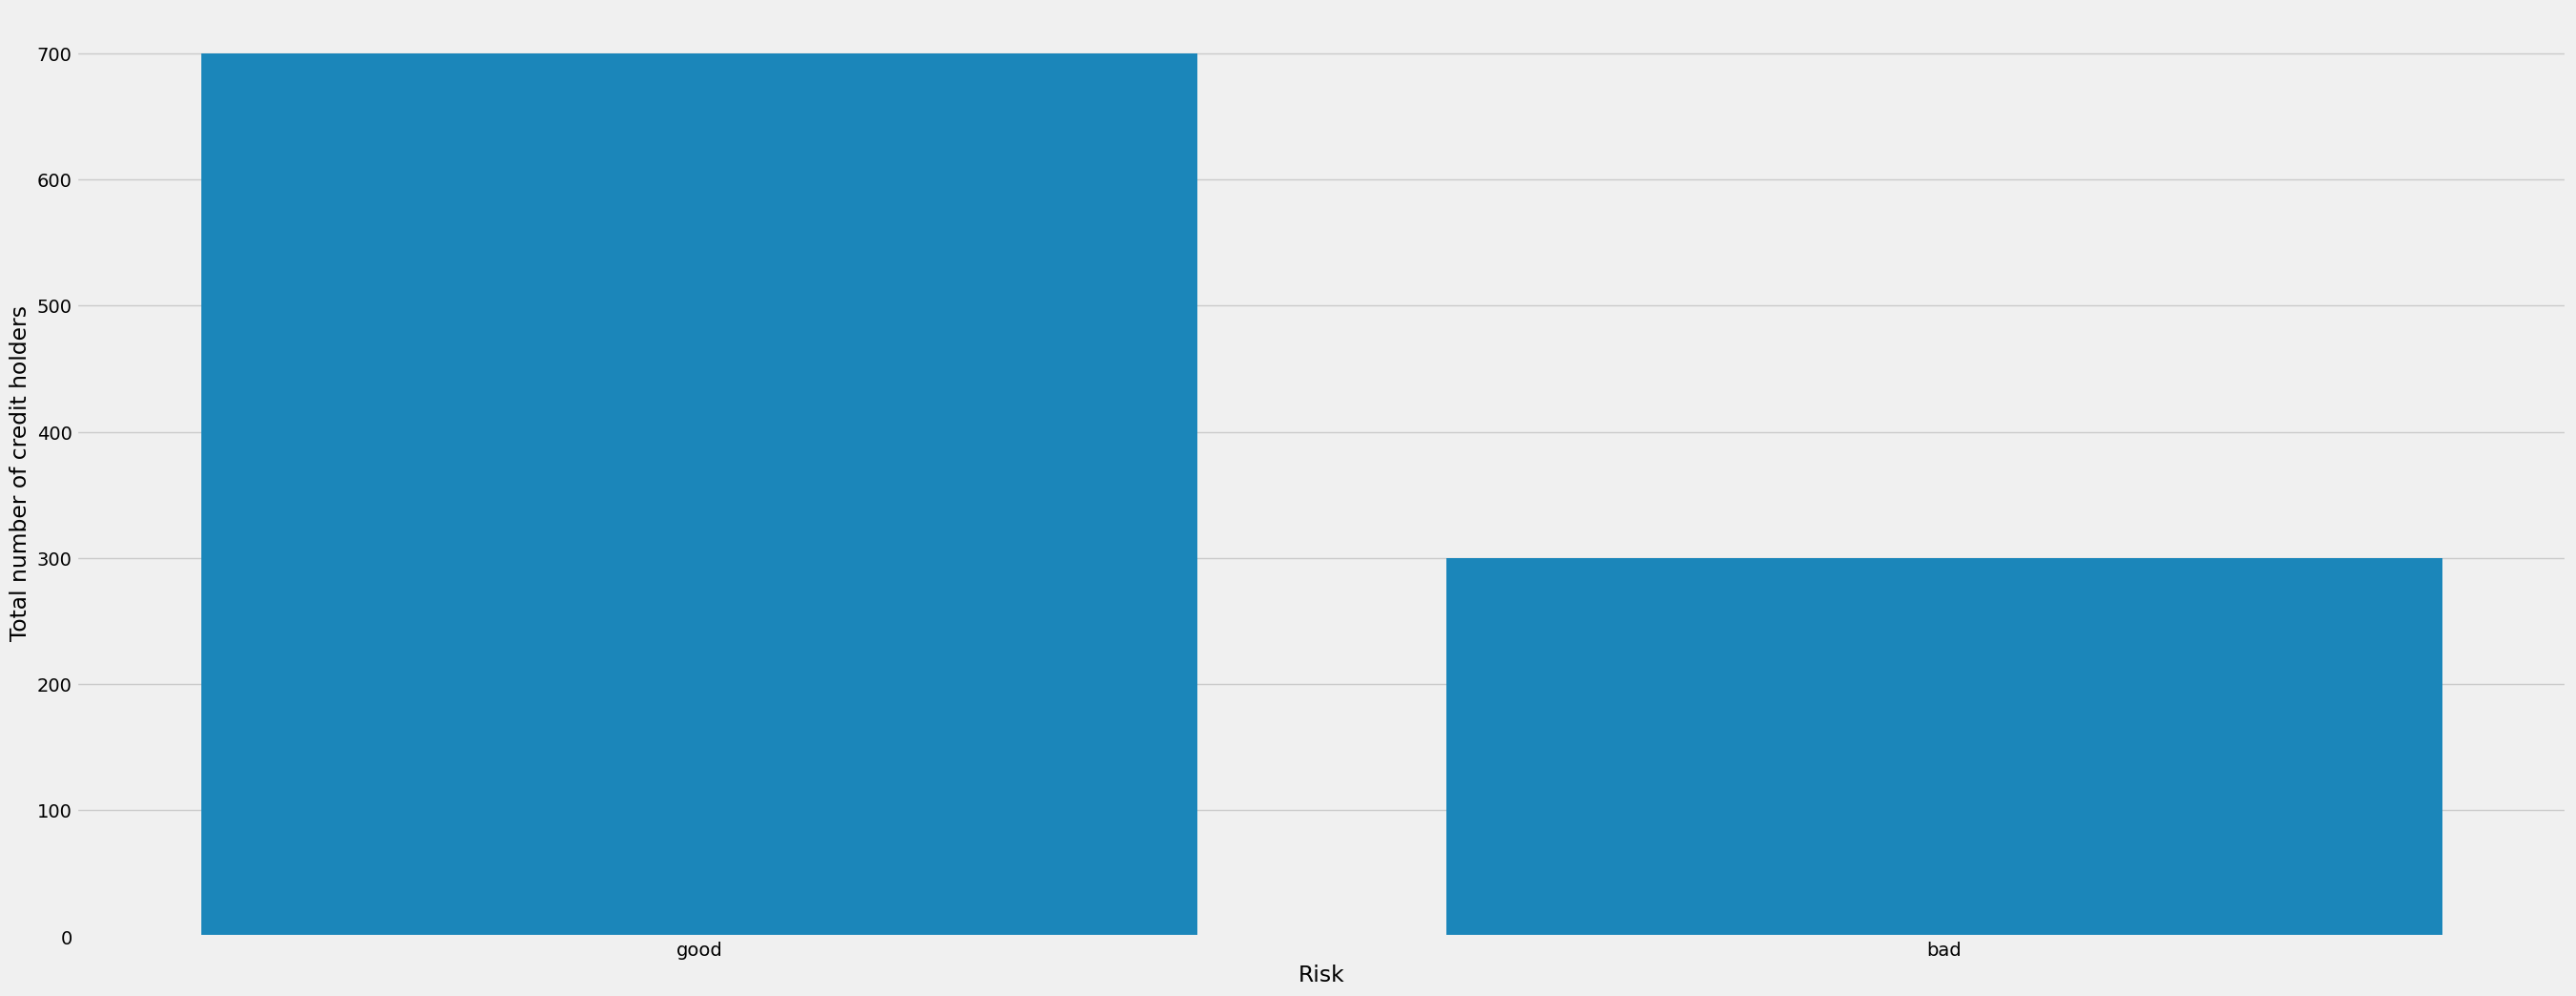

In [115]:
sns.countplot(x=df['Risk'])
plt.ylabel('Total number of credit holders')
plt.show()

#### insight: around 70% of applicants has good credit score

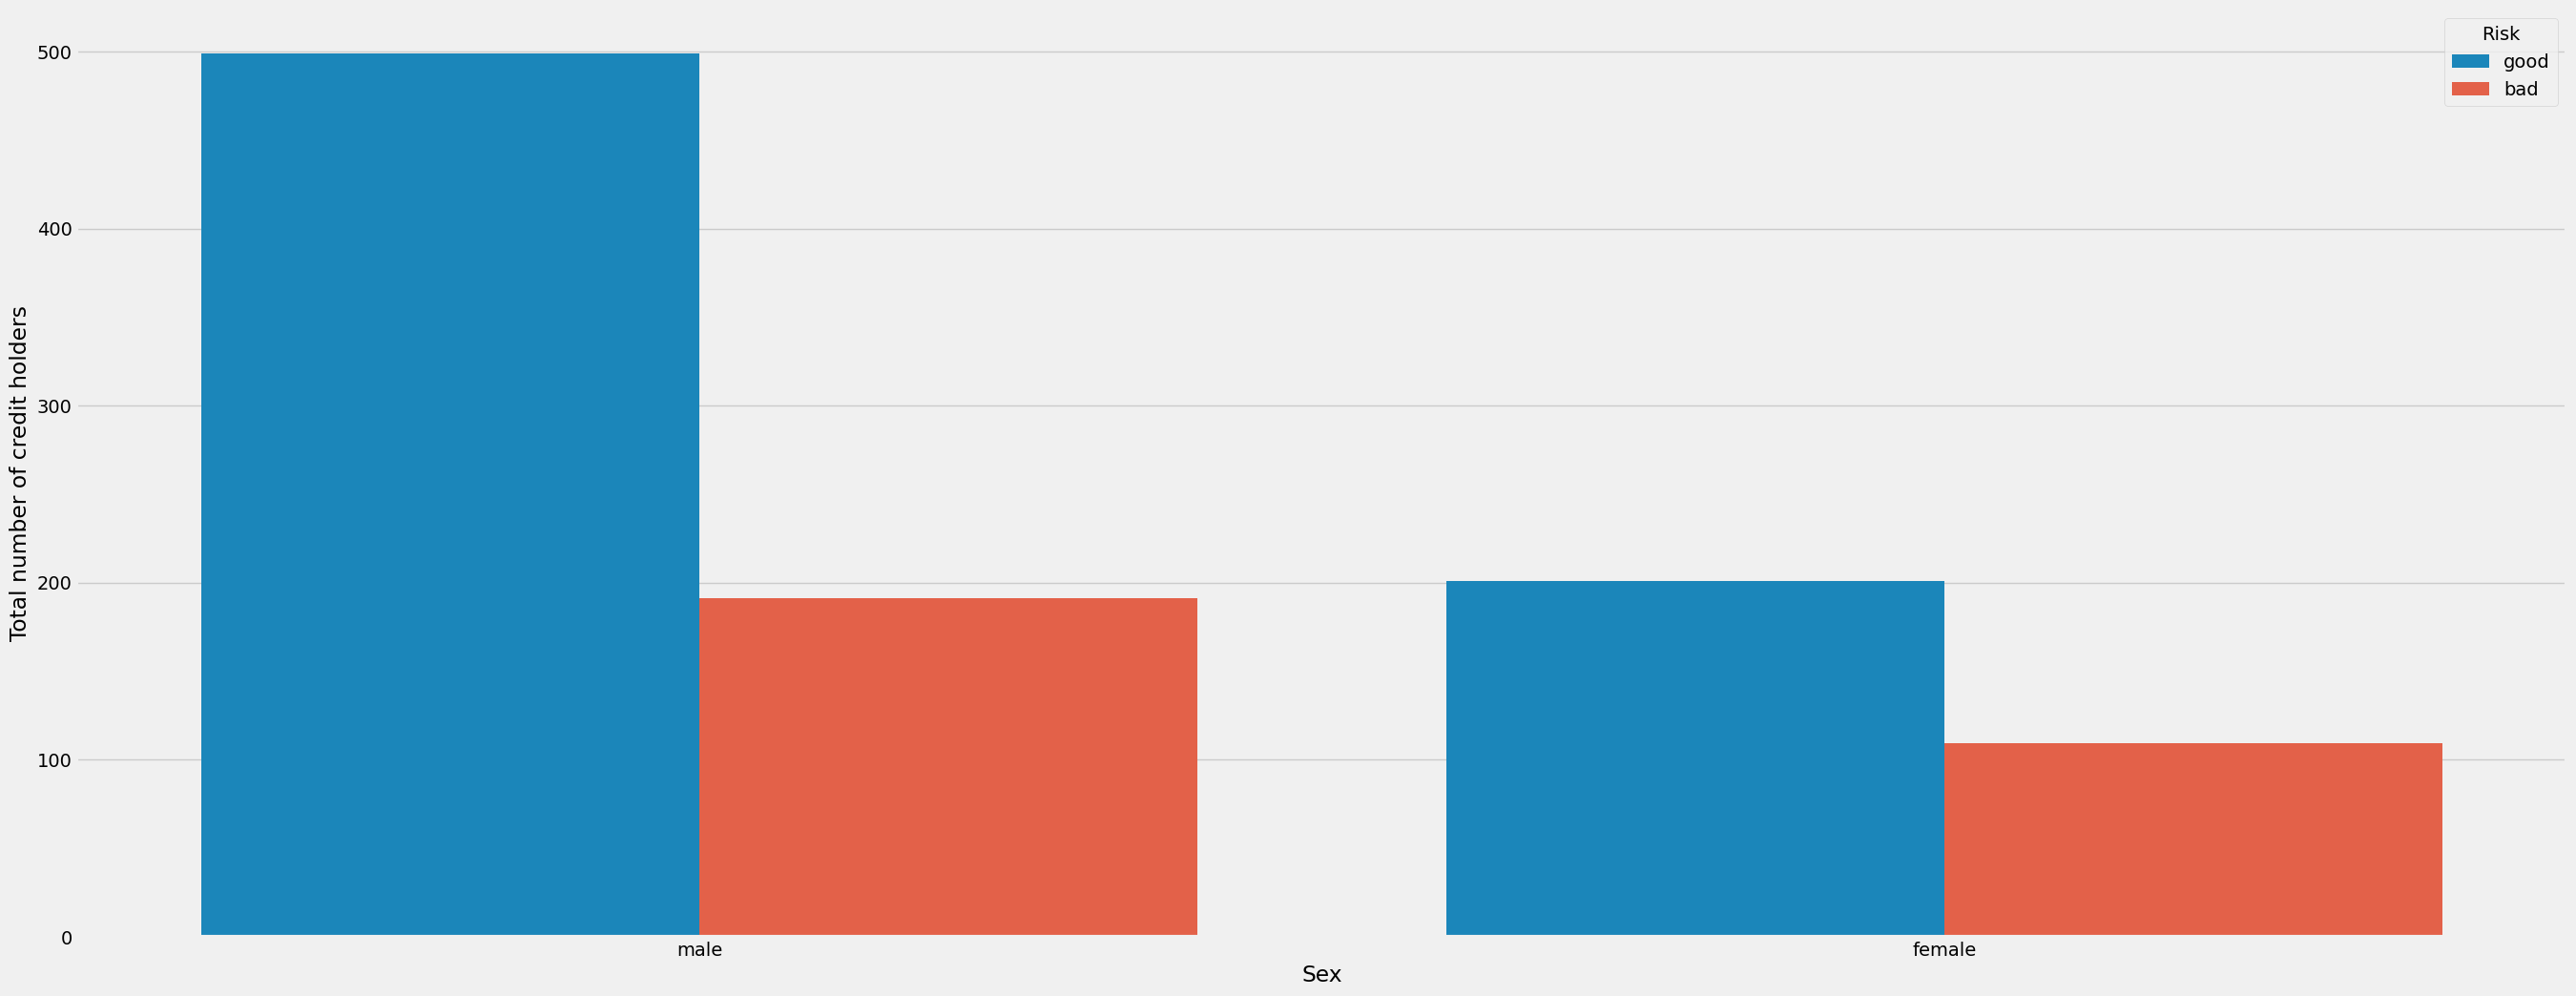

In [116]:
sns.countplot(x=df['Sex'],hue=df['Risk'])
plt.ylabel('Total number of credit holders')
plt.show()

#### insight: males has good credit score as compared to females

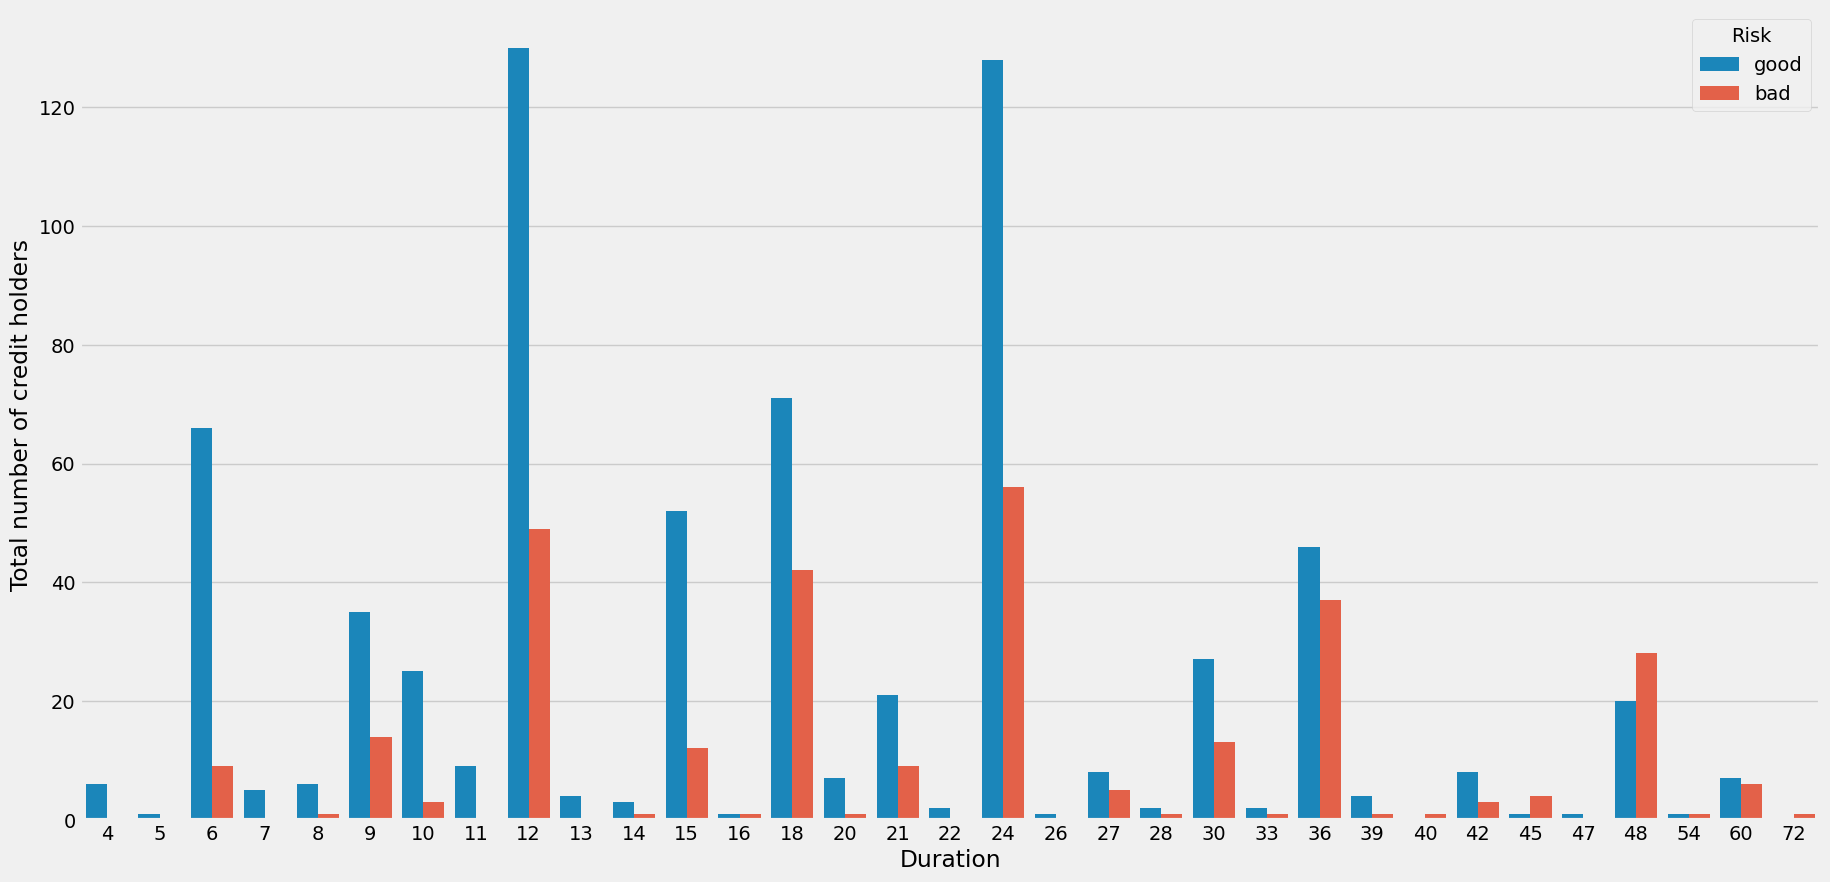

In [117]:
plt.figure(figsize=(20,10))
sns.countplot(x=df['Duration'],hue=df['Risk'])
plt.ylabel('Total number of credit holders')
plt.show()

##### insight: most people has good credit score around 1-2 years of duration

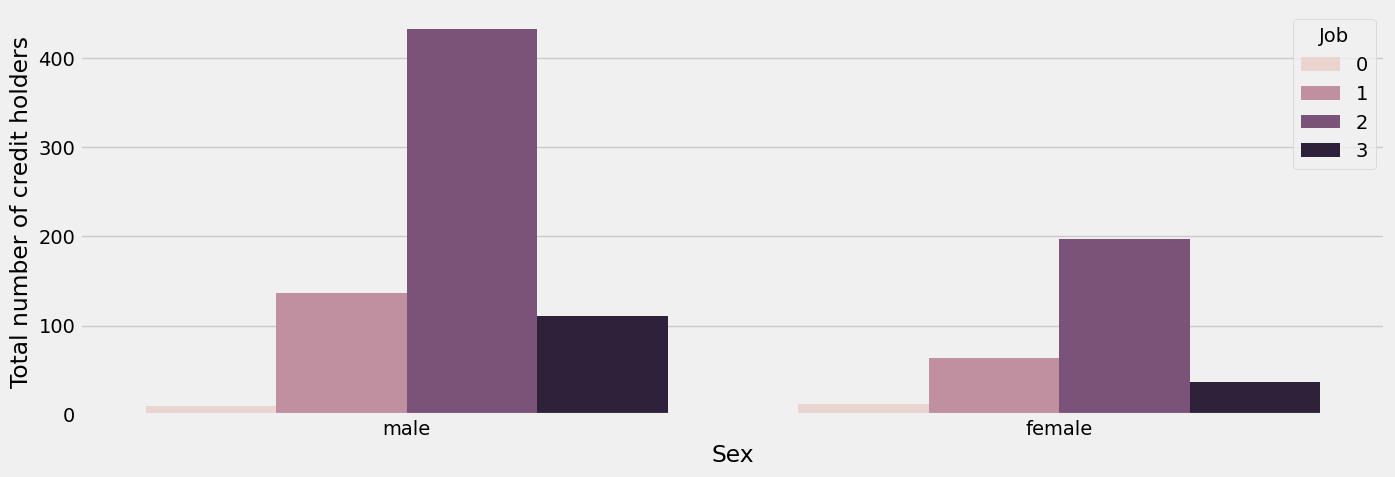

In [118]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Sex'],hue=df['Job'])
plt.ylabel('Total number of credit holders')
plt.show()

#### insight: males and female skilled workers hold most credit cards 

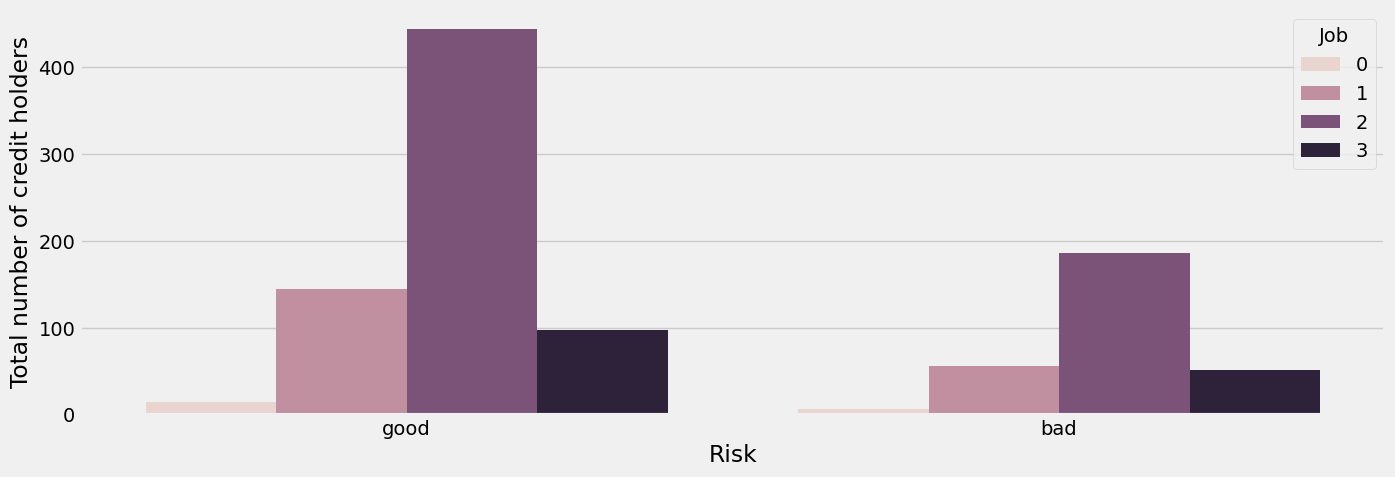

In [119]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Risk'],hue=df['Job'])
plt.ylabel('Total number of credit holders')
plt.show()

Unskilled and Non-Resident (Job = 0): This category likely includes individuals who are unskilled workers and non-residents. They may have lower job security and income stability.

Unskilled and Resident (Job = 1): This category may comprise unskilled workers who are residents. These individuals might have a degree of job stability due to their residency.

Skilled (Job = 2): The "Skilled" category typically represents individuals with skills or training in specific professions or trades. They are likely to have better job security and income stability compared to unskilled workers.

Highly Skilled (Job = 3): This category likely includes individuals with advanced skills and qualifications. They are expected to have high job security and potentially higher income levels compared to the other categories.

##### insight: skilled people hold most credit cards and 70% have good credit score

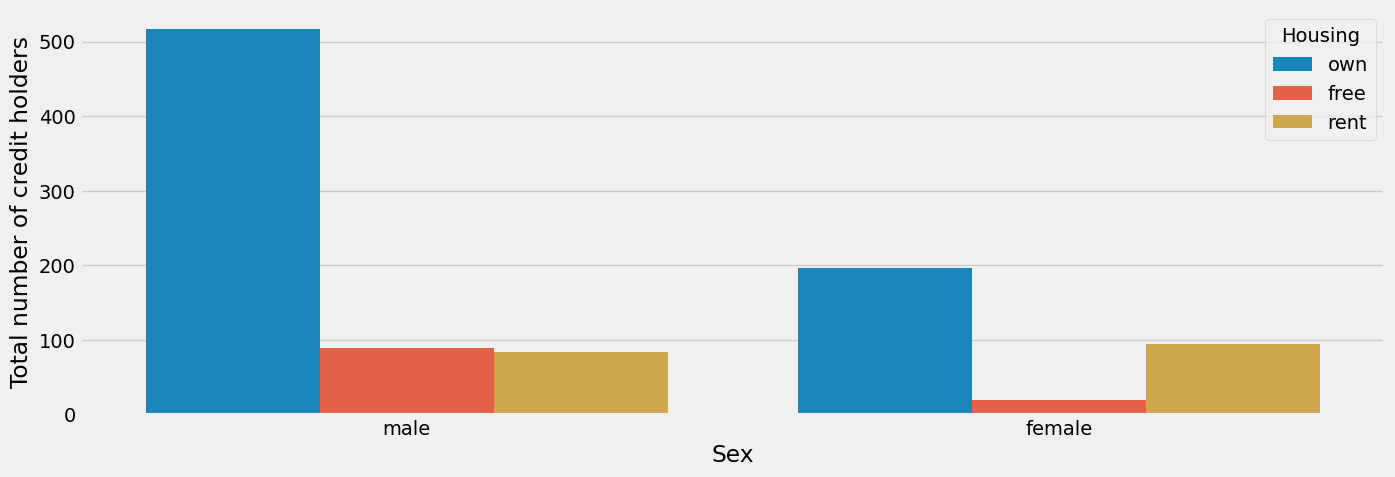

In [120]:
plt.figure(figsize=(15,5))
sns.countplot(x=df['Sex'],hue=df['Housing'])
plt.ylabel('Total number of credit holders')
plt.show()

#### insight:  Males and females who own houses are holds most credit cards. Especially males who own a house holds most credit cards

In [121]:
df['Purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

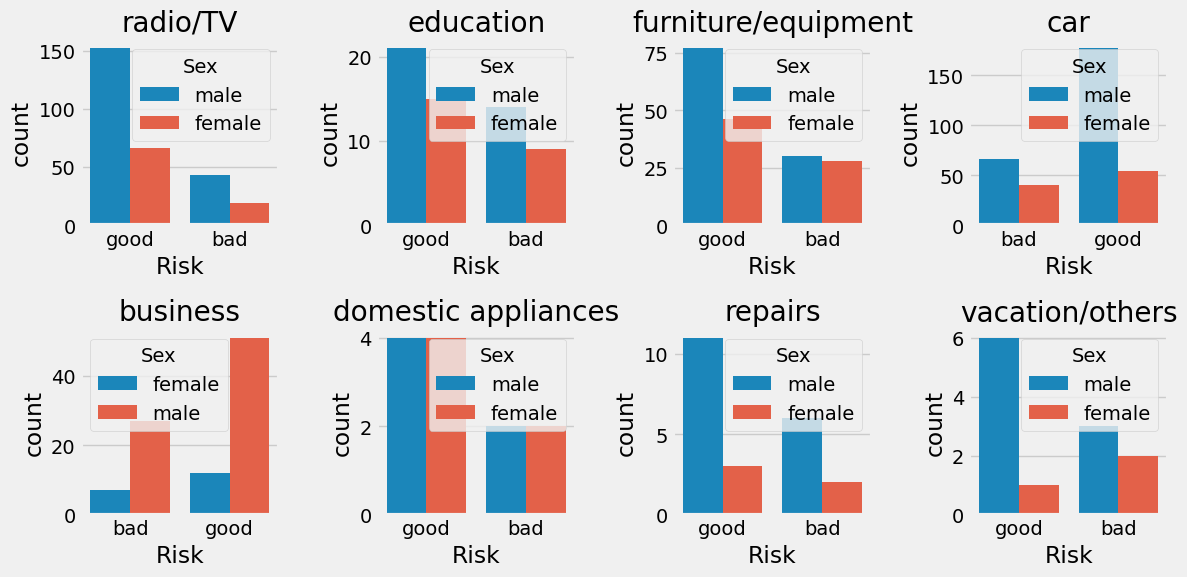

In [122]:
plt.figure(figsize = (12,6))
purpose = df.set_index('Purpose')
n = 1

for i in df['Purpose'].unique().tolist():
    plt.subplot(2,4,n)
    ax = sns.countplot(x = 'Risk', hue = 'Sex', data = purpose.loc[i])
    ax.set_title(i)
    n += 1
plt.tight_layout()

##### insight: males has taken credit for all kinds of purposes and have a good credit score. While women mostly used credit for education and domestic appliances.

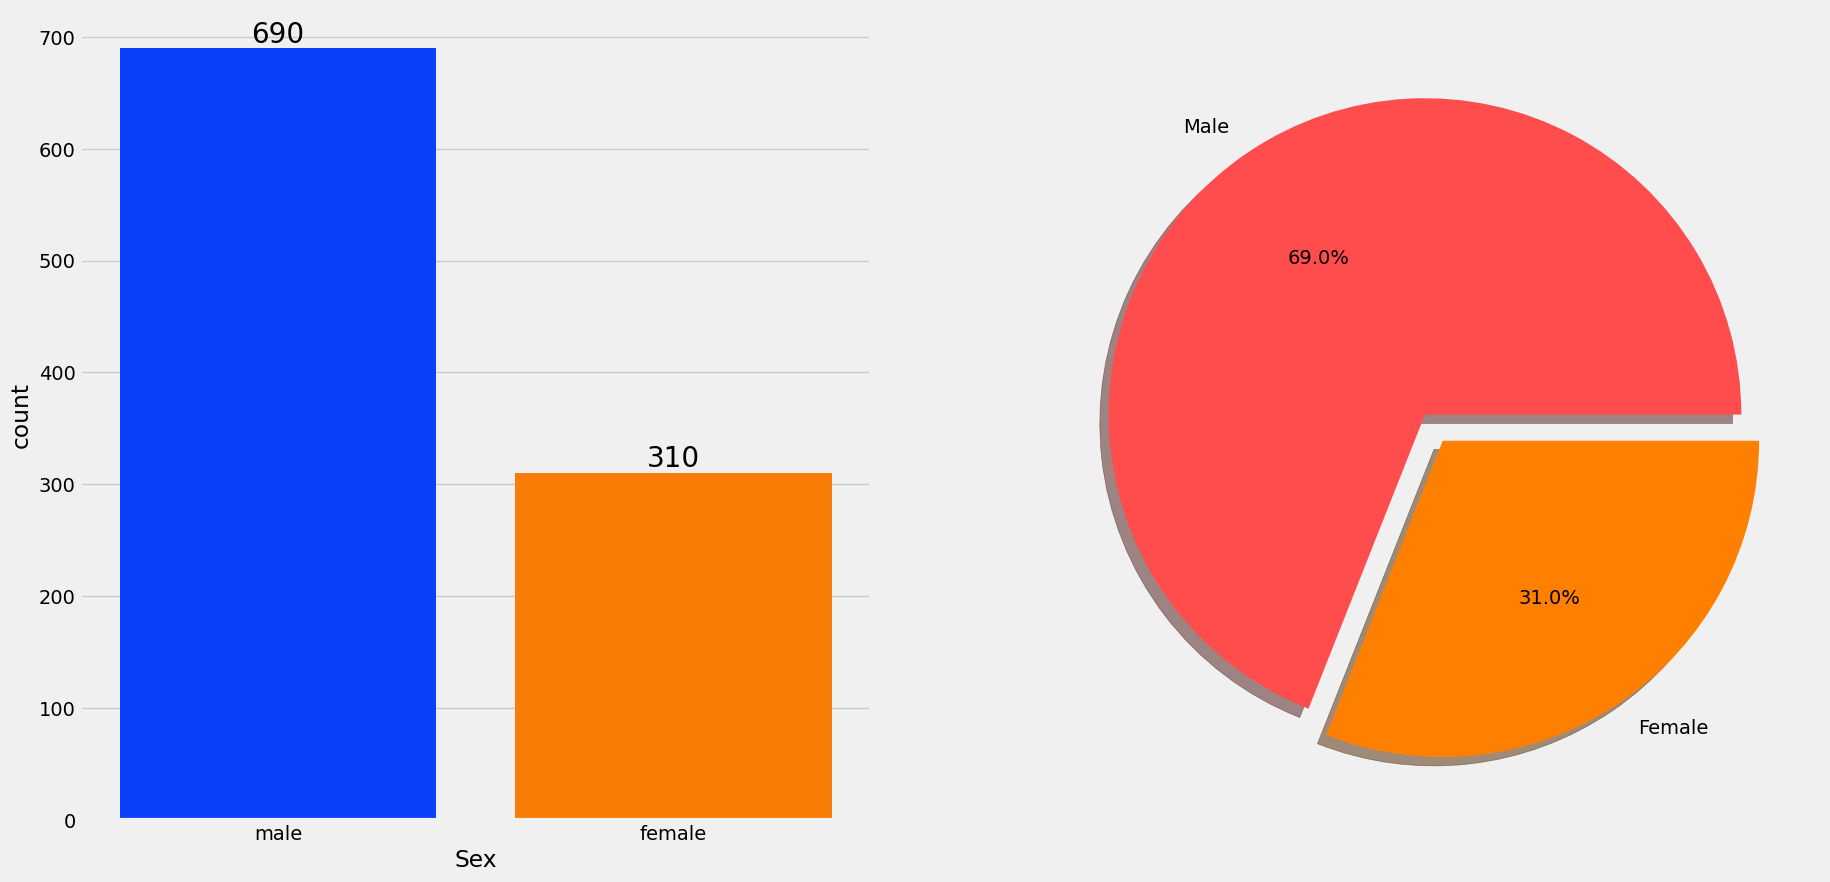

In [123]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Sex'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Sex'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

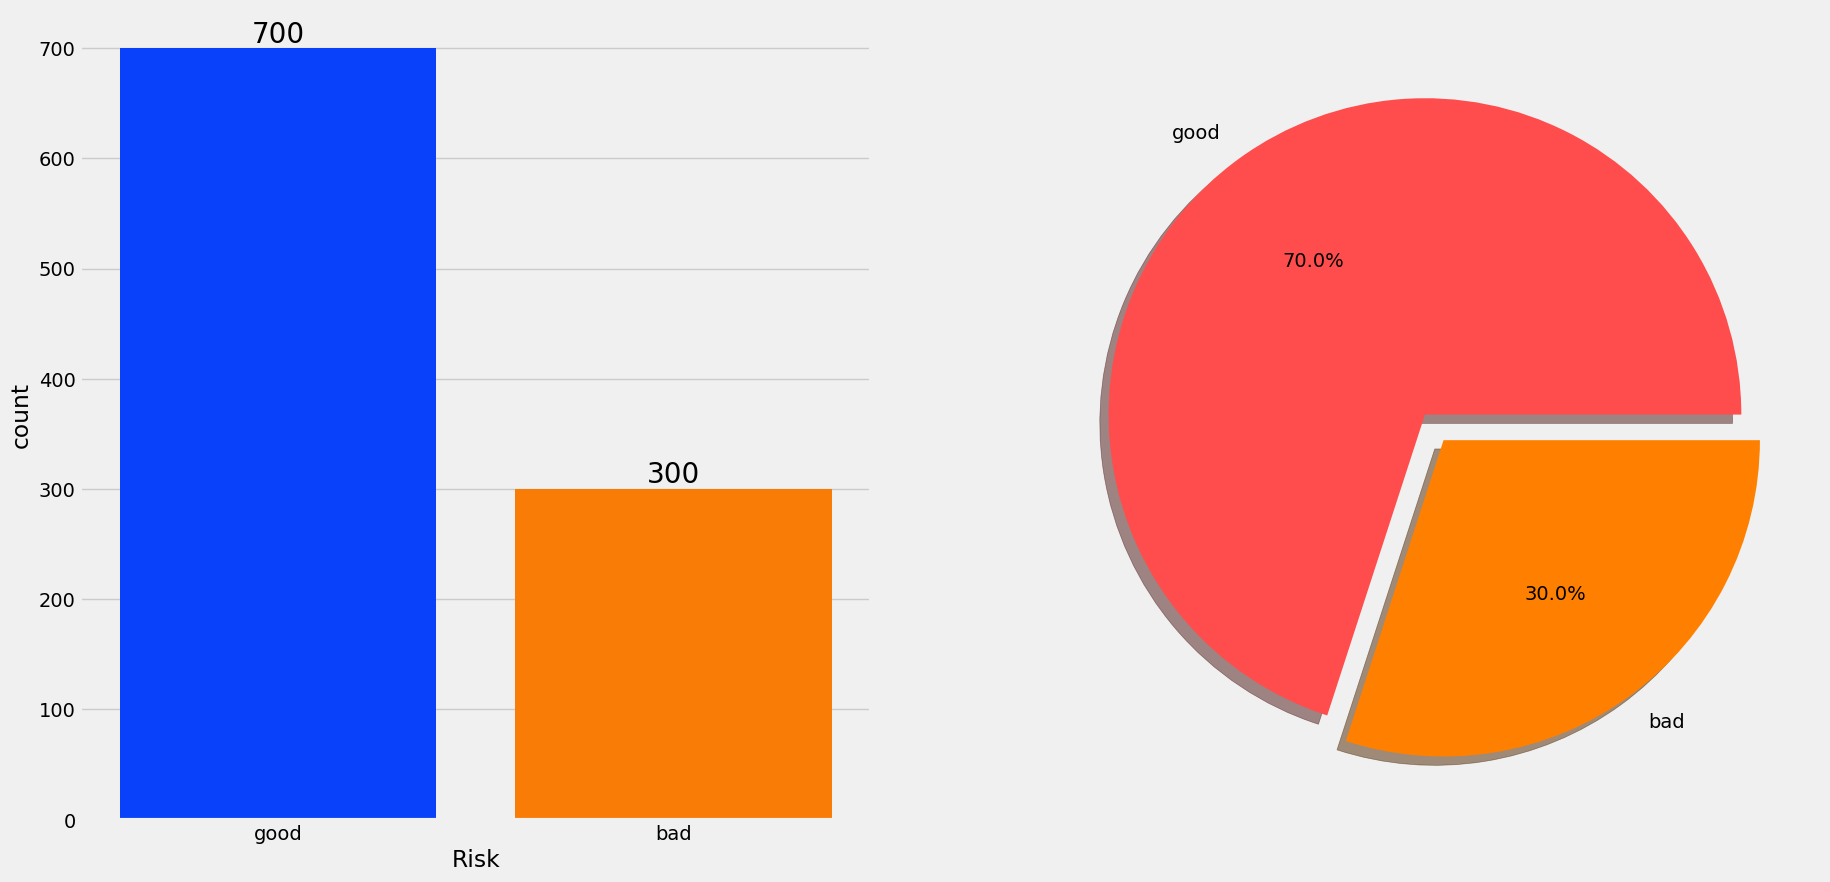

In [124]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Risk'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Risk'].value_counts(),labels=['good','bad'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

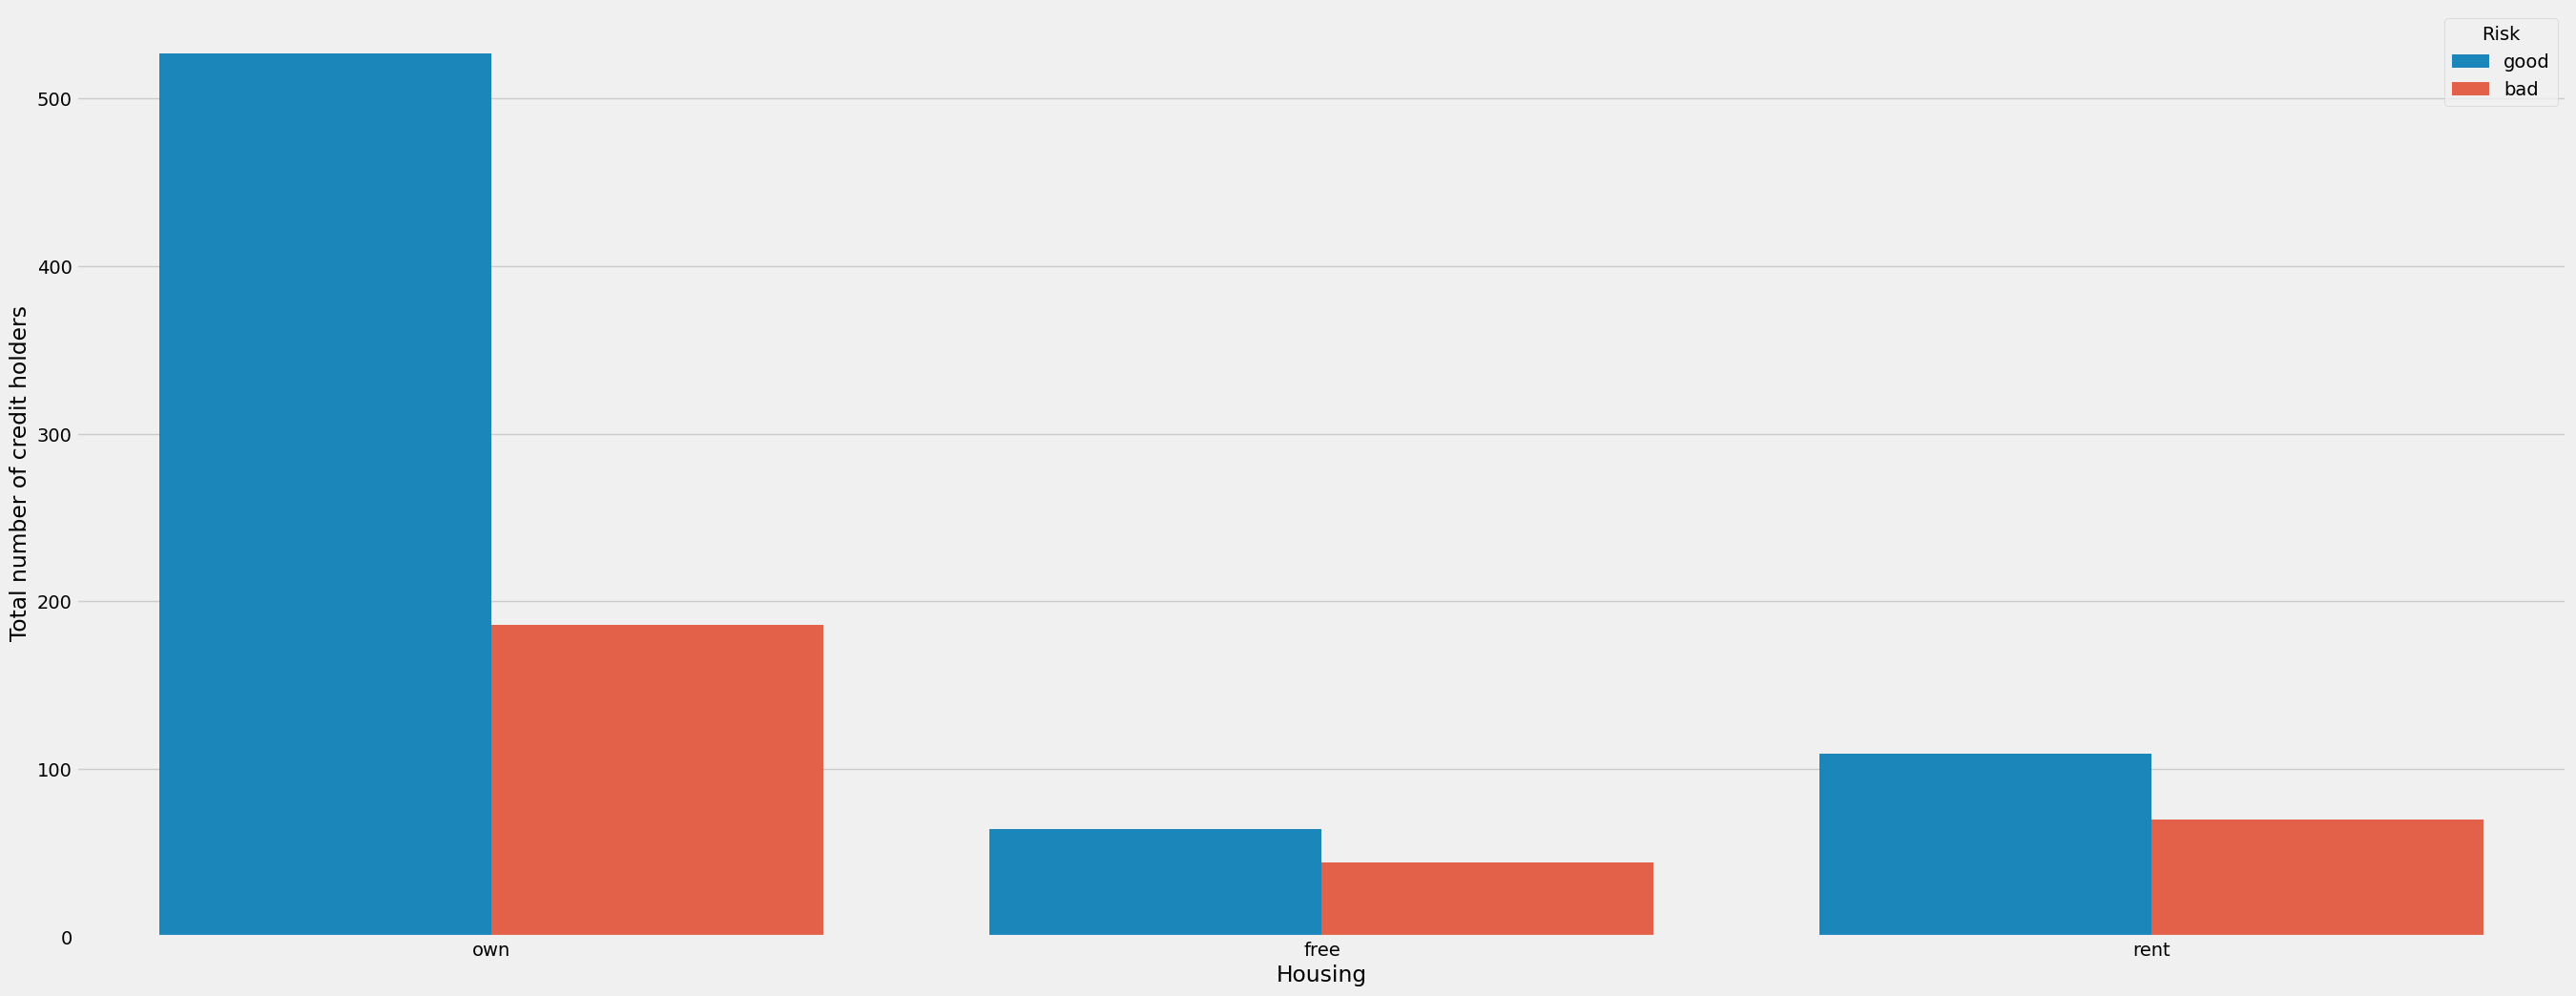

In [125]:
sns.countplot(x=df['Housing'],hue=df['Risk'])
plt.ylabel('Total number of credit holders')
plt.show()

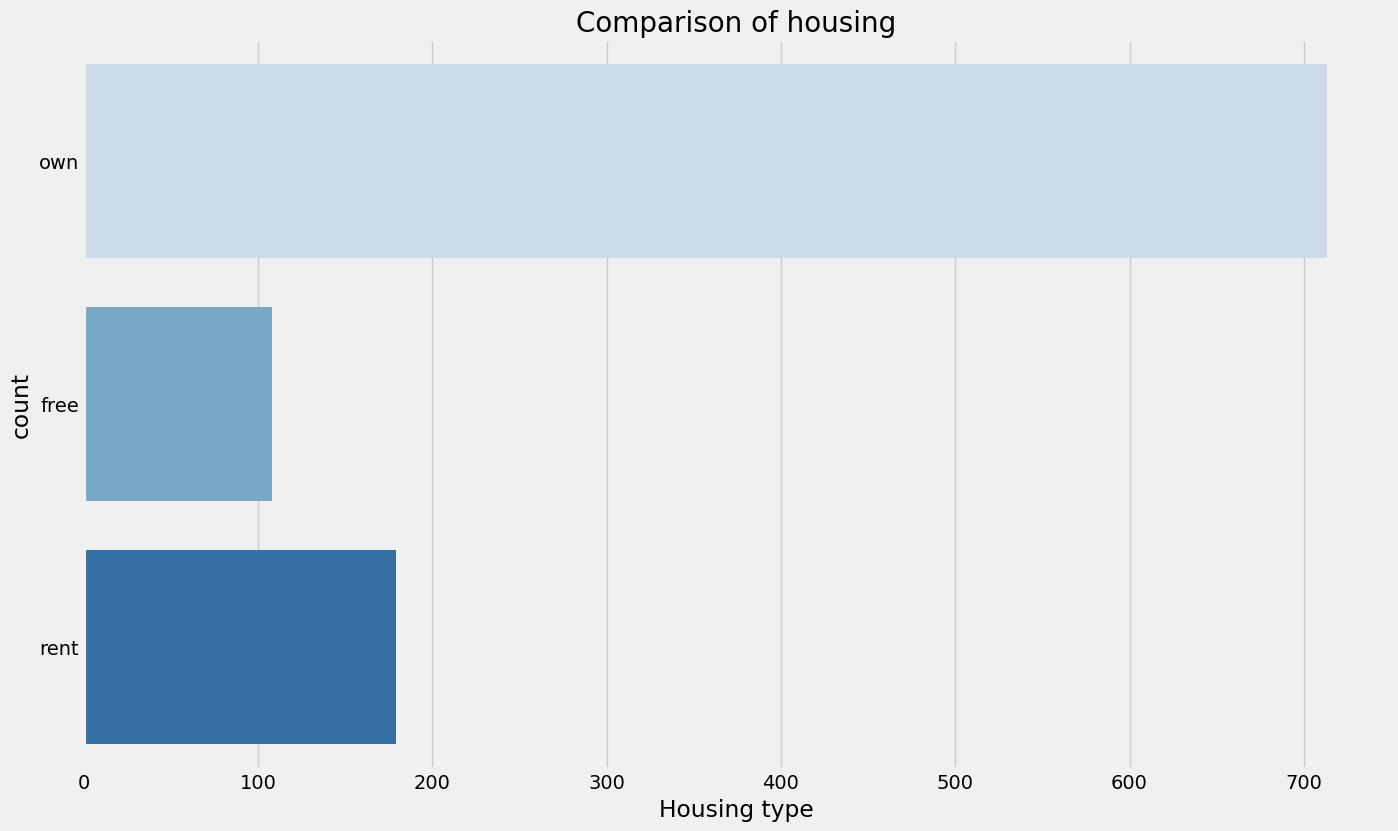

In [126]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['Housing'], palette = 'Blues')
plt.title('Comparison of housing', fontweight = 30, fontsize = 20)
plt.xlabel('Housing type')
plt.ylabel('count')
plt.show()

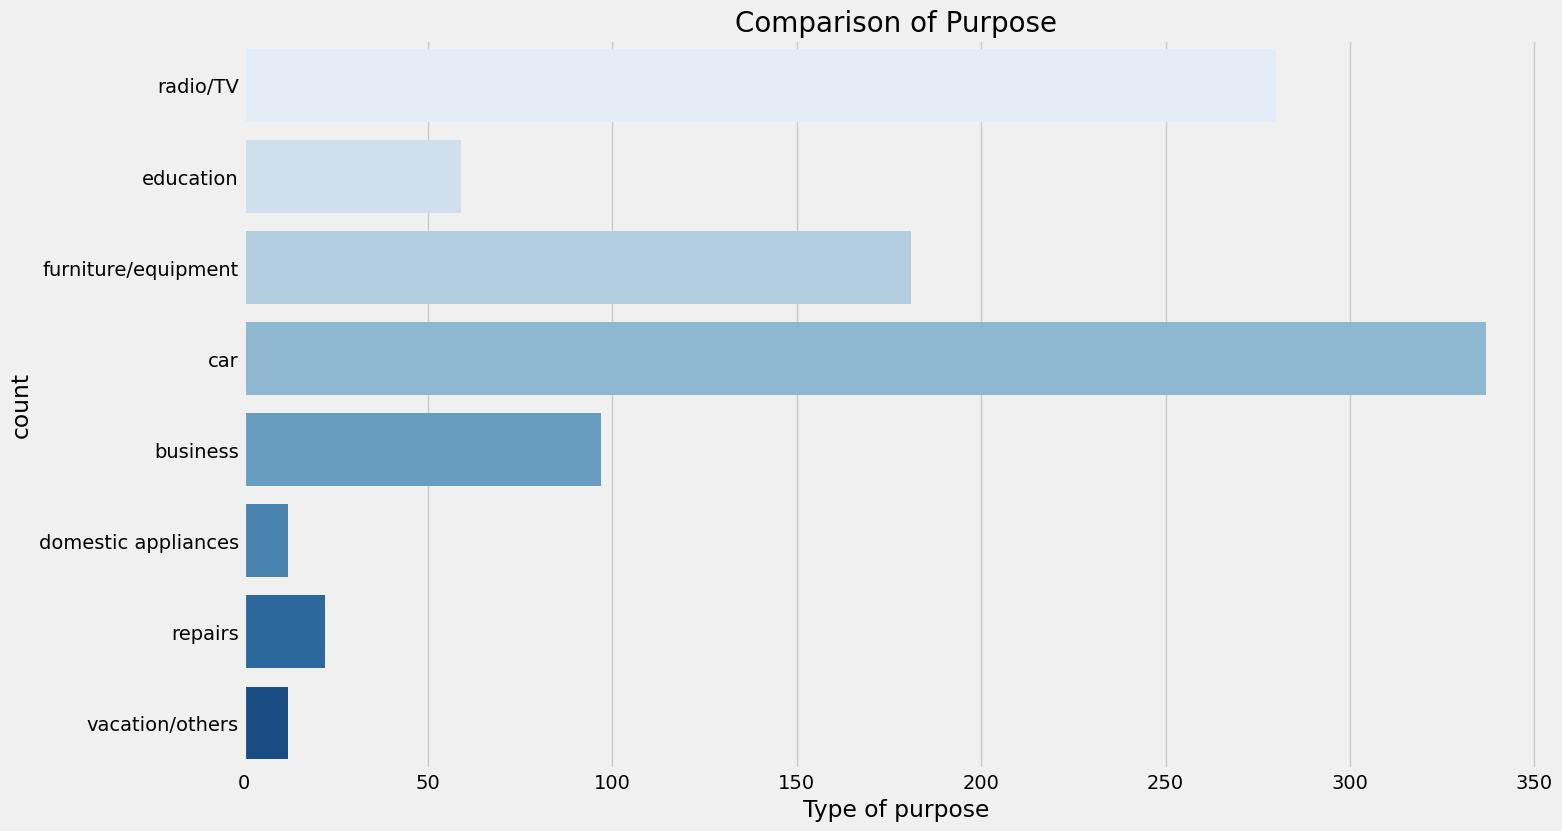

In [127]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['Purpose'], palette = 'Blues')
plt.title('Comparison of Purpose', fontweight = 30, fontsize = 20)
plt.xlabel('Type of purpose')
plt.ylabel('count')
plt.show()

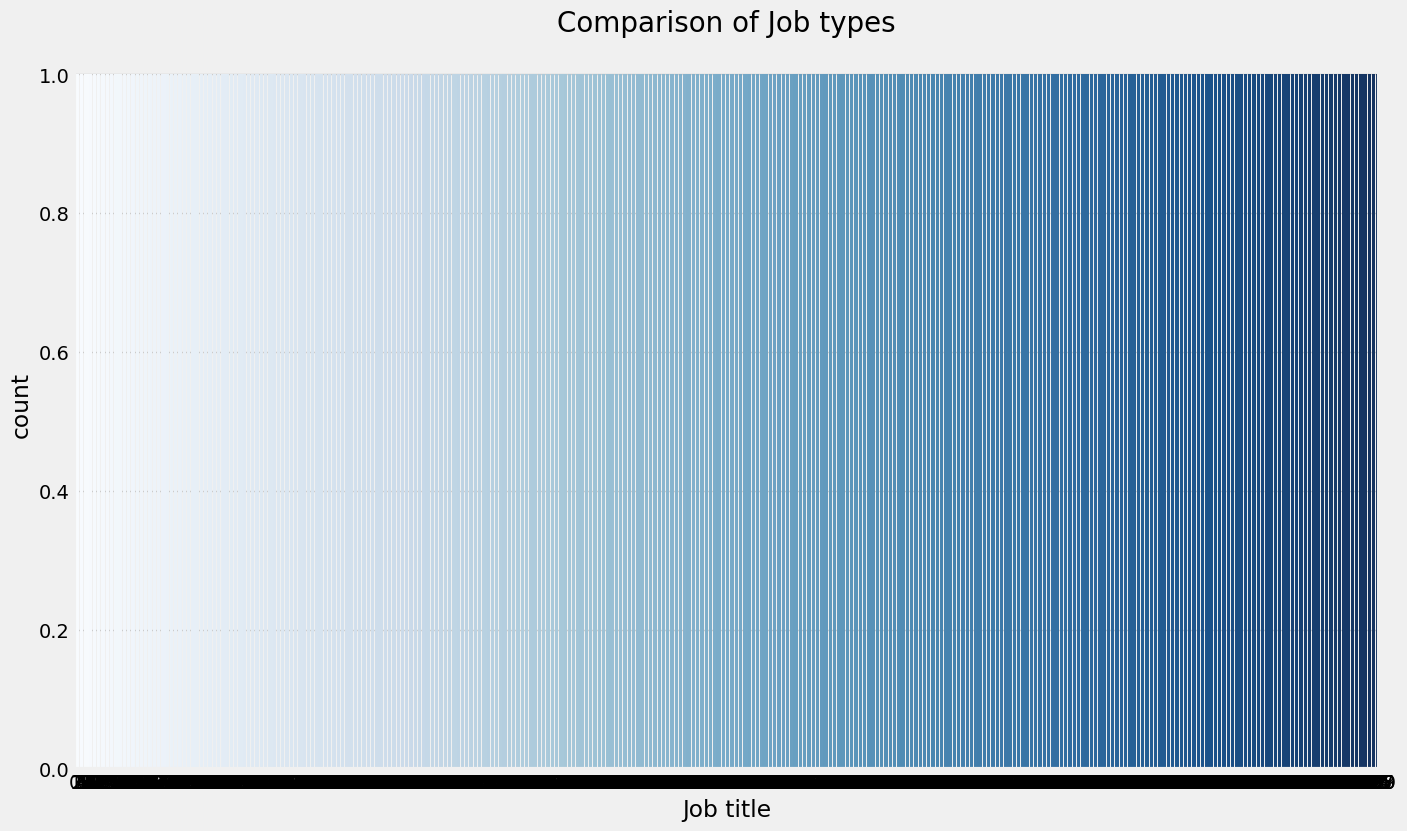

In [128]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['Job'], palette = 'Blues')
plt.title('Comparison of Job types', fontweight = 30, fontsize = 20)
plt.xlabel('Job title')
plt.ylabel('count')
plt.show()

In [129]:
df.columns


Index(['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

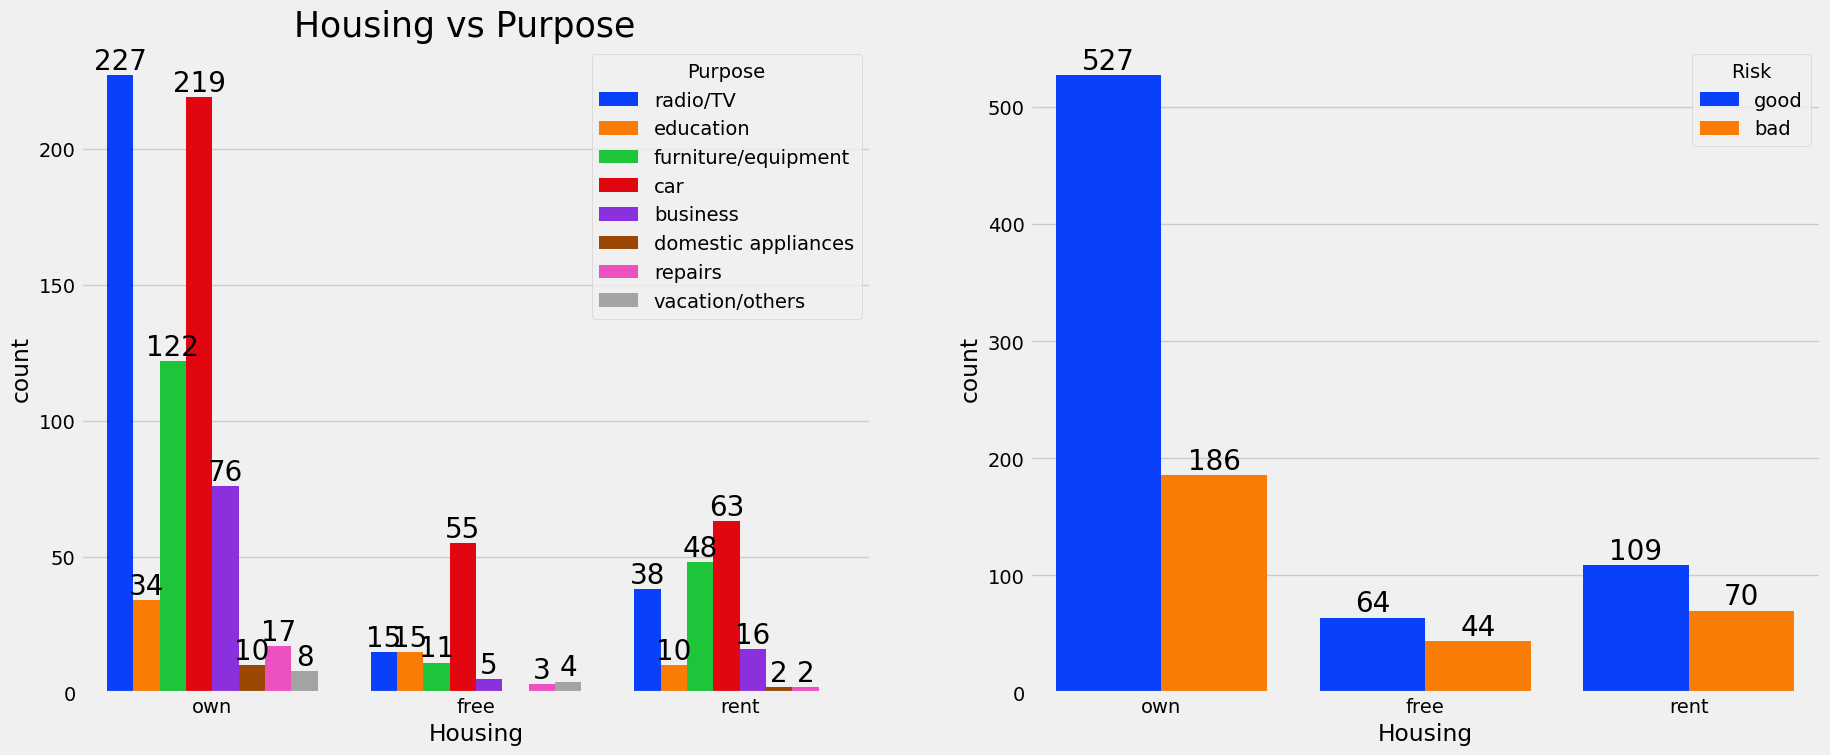

In [130]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['Housing'],data=df,palette = 'bright',hue='Purpose',saturation=0.95,ax=ax[0])
ax[0].set_title('Housing vs Purpose  ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['Housing'],data=df,palette = 'bright',hue='Risk',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

In [131]:
print("Categories in 'Sex' variable:     ",end=" " )
print(df['Sex'].unique())

print("Categories in 'Housing' variable:  ",end=" ")
print(df['Housing'].unique())

print("Categories in 'Saving accounts' variable:",end=" " )
print(df['Saving accounts'].unique())

print("Categories in 'Checking account' variable:     ",end=" " )
print(df['Checking account'].unique())

print("Categories in 'Purpose' variable:     ",end=" " )
print(df['Purpose'].unique())

print("Categories in 'Risk' variable:     ",end=" " )
print(df['Risk'].unique())

Categories in 'Sex' variable:      ['male' 'female']
Categories in 'Housing' variable:   ['own' 'free' 'rent']
Categories in 'Saving accounts' variable: ['little' 'quite rich' 'rich' 'moderate']
Categories in 'Checking account' variable:      ['little' 'moderate' 'rich']
Categories in 'Purpose' variable:      ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Categories in 'Risk' variable:      ['good' 'bad']


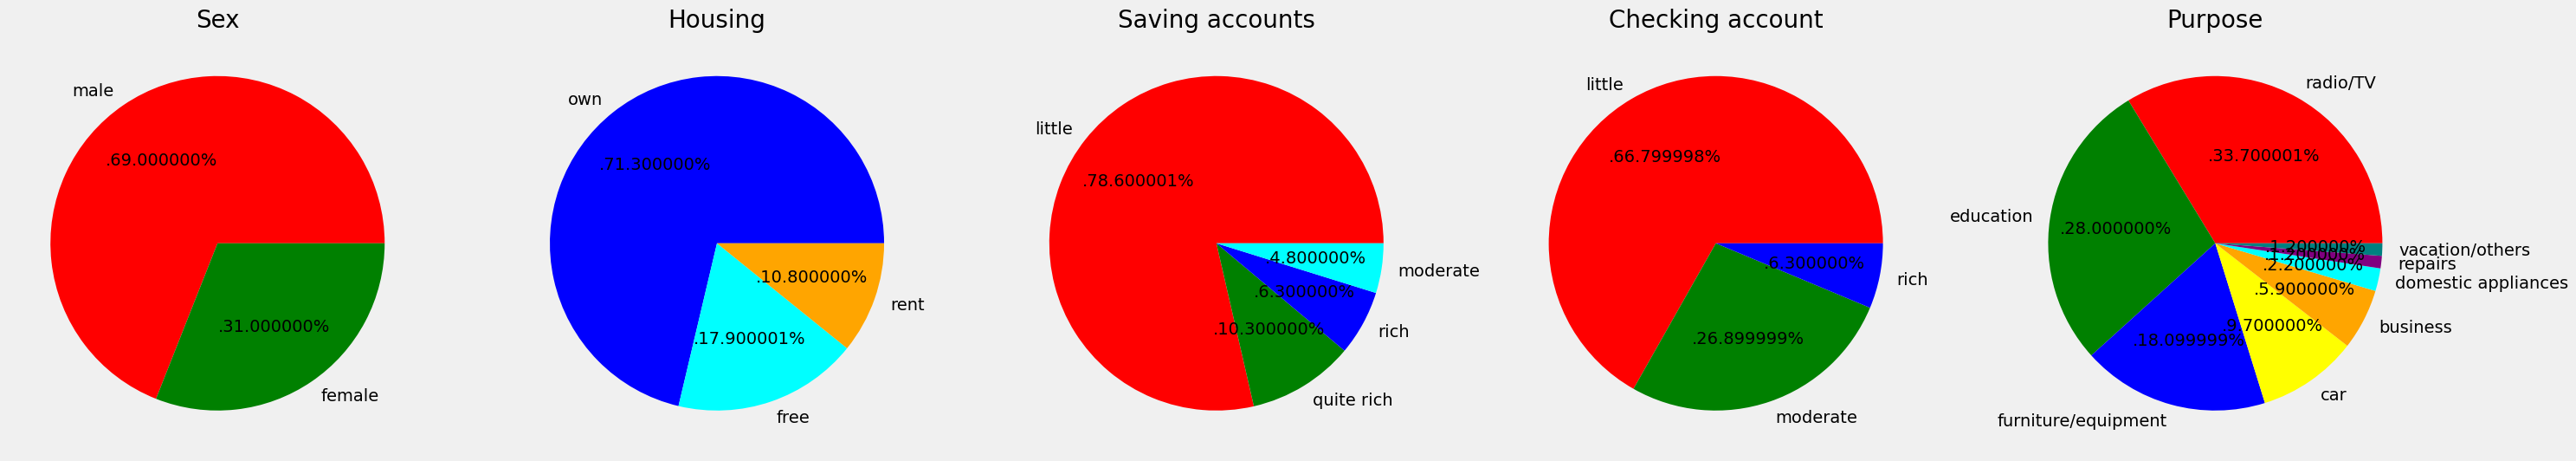

In [132]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['Sex'].value_counts()
labels = 'male', 'female'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Sex', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['Housing'].value_counts()
labels = 'own','free','rent'
color = ['blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Housing', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['Saving accounts'].value_counts()
labels = 'little','quite rich','rich','moderate'
color = ['red','green','blue','cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Saving accounts', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['Checking account'].value_counts()
labels = 'little','moderate','rich'
color = ['red','green','blue','yellow']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Checking account', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['Purpose'].value_counts()
labels = 'radio/TV','education','furniture/equipment','car','business','domestic appliances','repairs','vacation/others'
color = ['red','green','blue','yellow','orange','cyan','purple','teal' ]

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Purpose', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

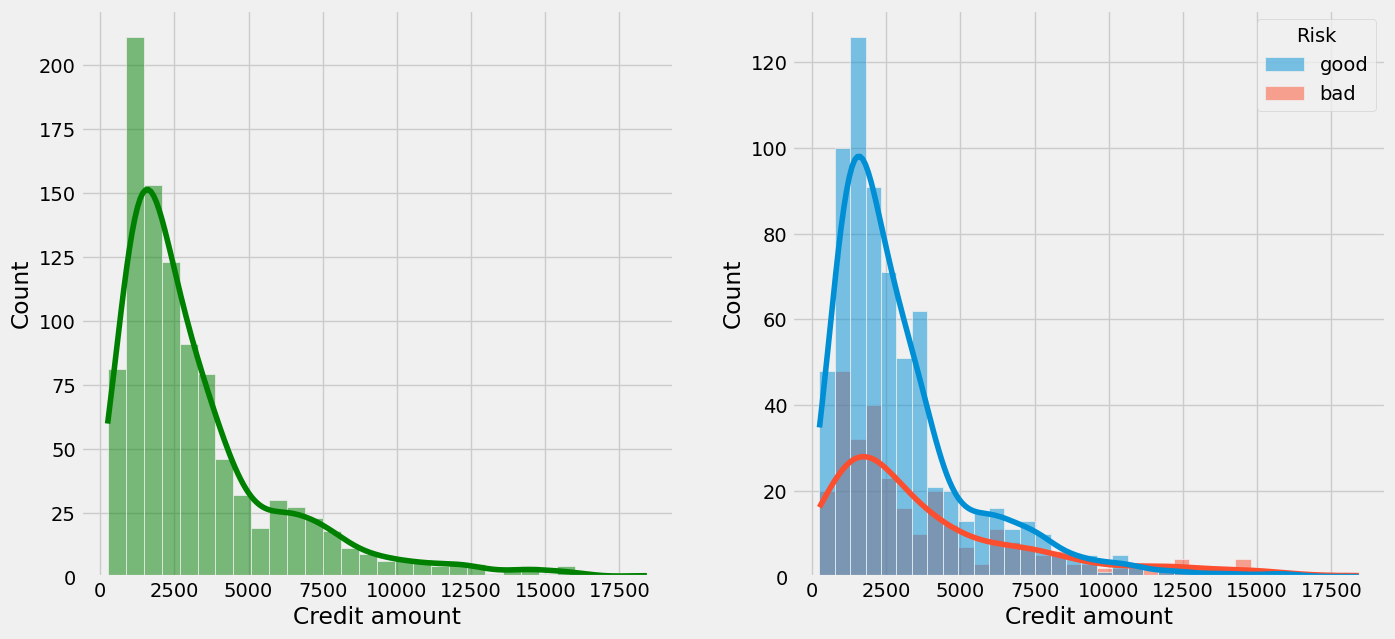

In [133]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Credit amount',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Credit amount',kde=True,hue='Risk')
plt.show()

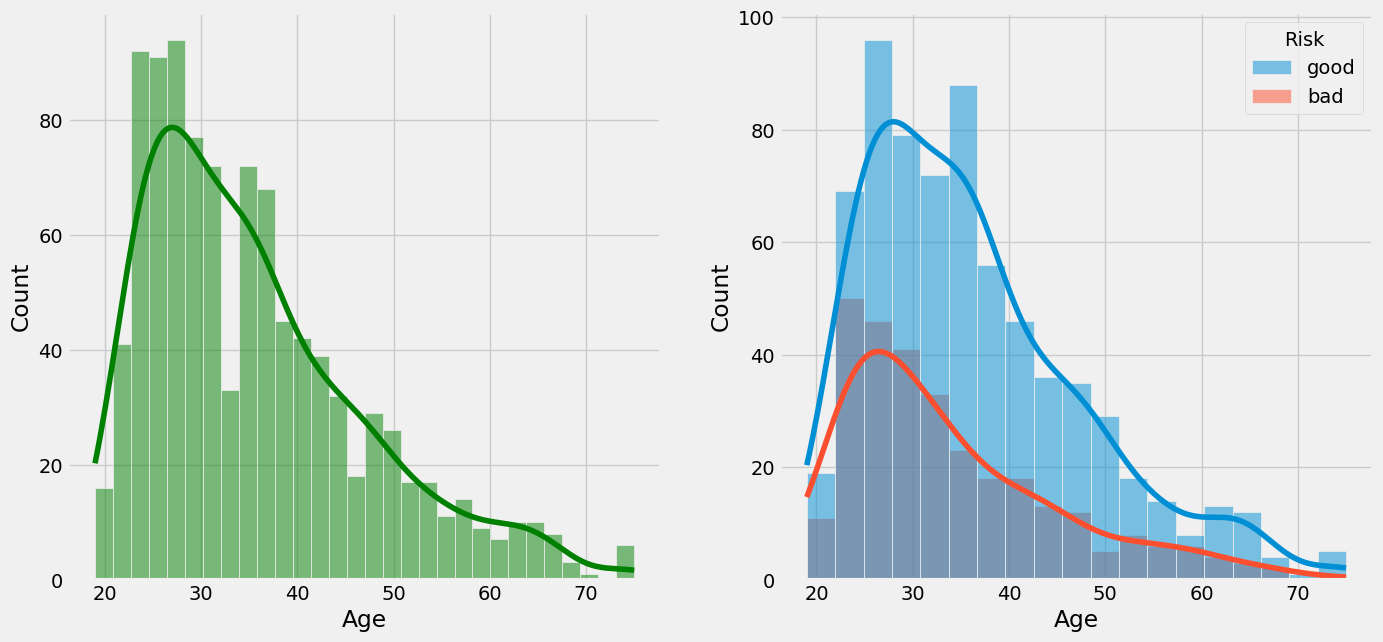

In [134]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Age',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Age',kde=True,hue='Risk')
plt.show()

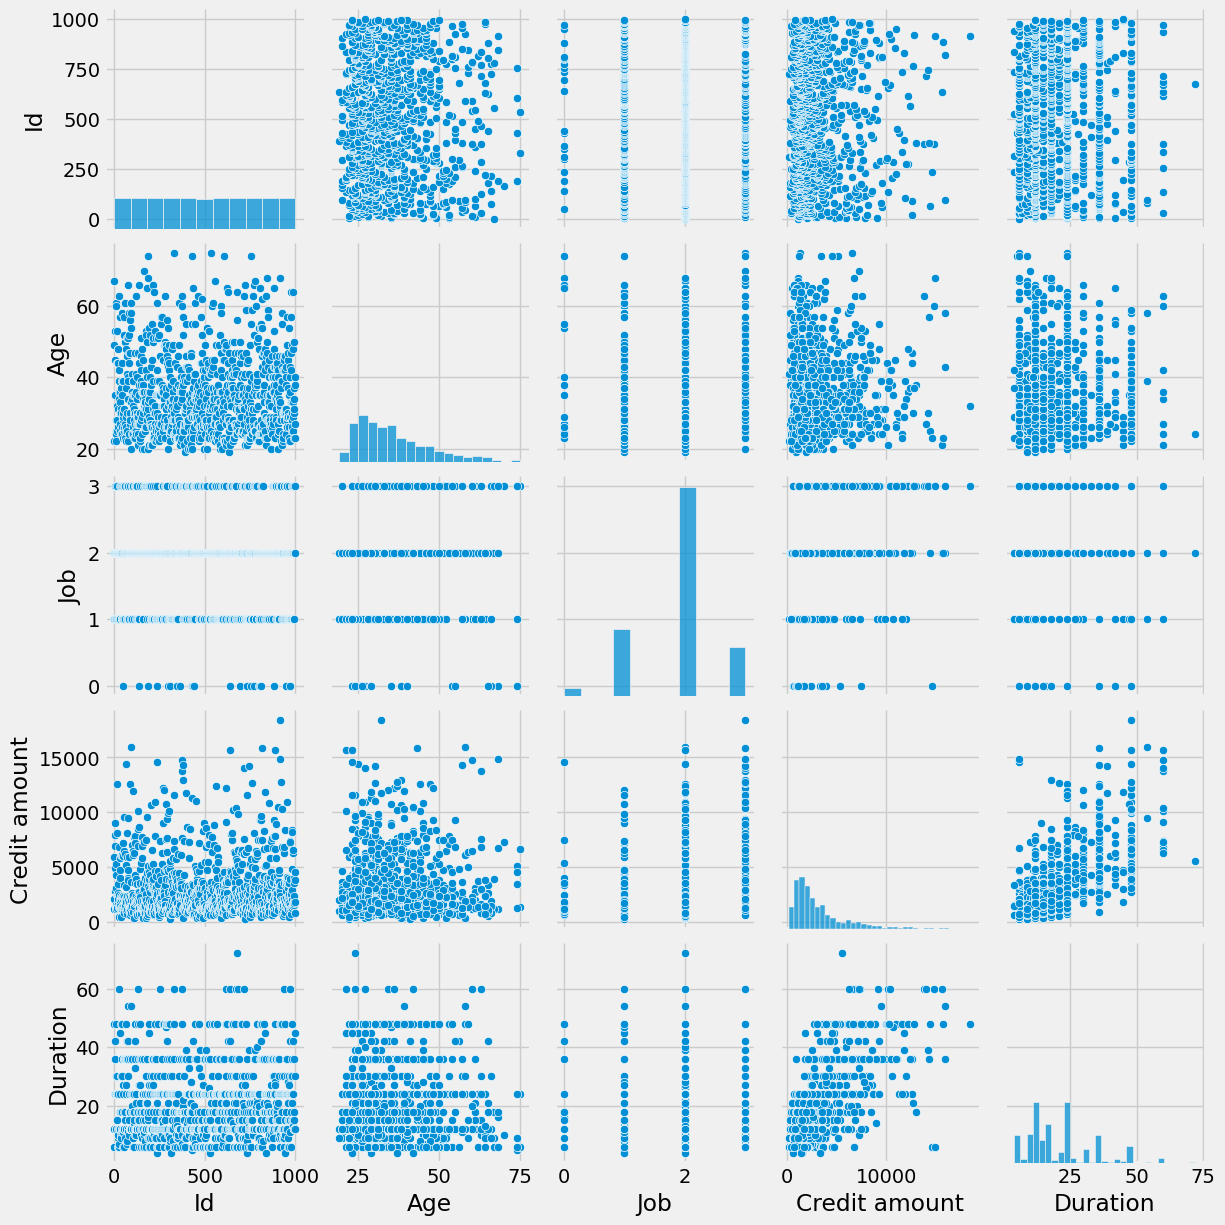

In [135]:
sns.pairplot(df)
plt.show()

In [136]:
df.columns

Index(['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

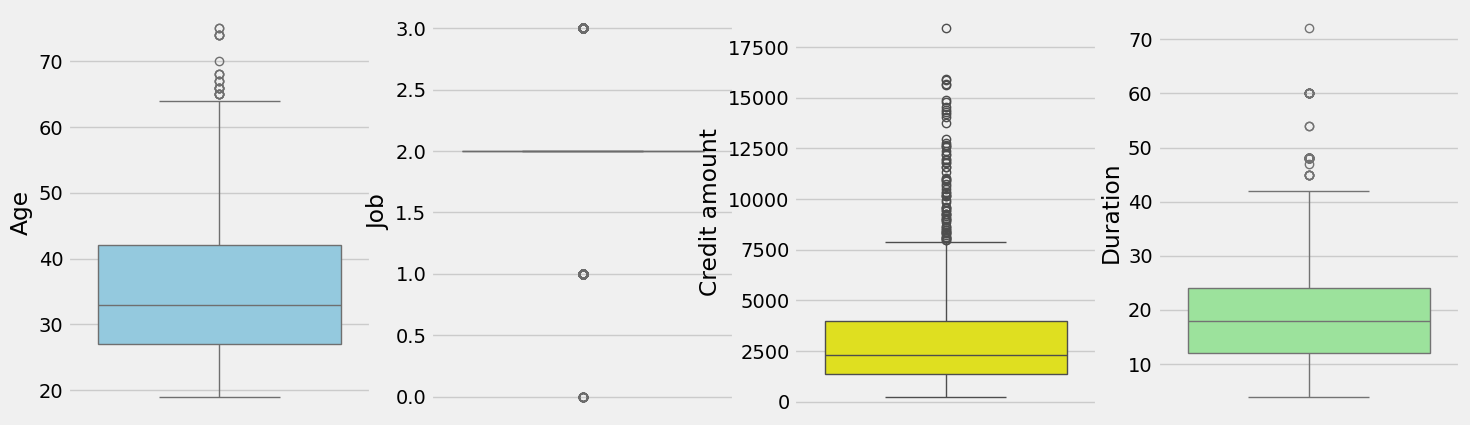

In [137]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['Age'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['Job'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['Credit amount'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Duration'],color='lightgreen')
plt.show()

In [138]:
import pandas as pd
import numpy as np

# Load the German Credit Risk Analysis dataset
data = pd.read_csv('german_credit_data.csv')  # Replace 'your_data.csv' with the actual dataset file

# Select the columns to be processed for outlier removal
columns_to_process = ["Credit amount", "Duration", "Age"]

# Create a copy of the original dataset
data_cleaned = data.copy()

# Iterate through the selected columns
for column in columns_to_process:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    q1 = np.percentile(data_cleaned[column], 25)
    q3 = np.percentile(data_cleaned[column], 75)

    # Calculate the Interquartile Range (IQR)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Get indices of outliers in the current column
    outlier_indices = data_cleaned[(data_cleaned[column] < lower_bound) | (data_cleaned[column] > upper_bound)].index

    # Remove outliers in the current column
    data_cleaned = data_cleaned.drop(outlier_indices)

# Display the shapes of the original and cleaned datasets
print("Original Data Shape:", data.shape)
print("Cleaned Data Shape:", data_cleaned.shape)


FileNotFoundError: [Errno 2] No such file or directory: 'german_credit_data.csv'

In [ ]:
data_cleaned.to_csv('cleaned_german_credit_data.csv', index=False)
